## 1. Module import

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
# 사이킷런을 이용하여 붓꽃 데이터 로드

## 2. Data input

In [3]:
"""
caseno => 일련번호
Sepal Length => 꽃받침 길이
Sepal Width =>  꽃받침 너비
Petal Length => 꽃잎 길이
Petal Width => 꽃잎 너비
Species => 꽃의 종류
"""

'\ncaseno => 일련번호\nSepal Length => 꽃받침 길이\nSepal Width =>  꽃받침 너비\nPetal Length => 꽃잎 길이\nPetal Width => 꽃잎 너비\nSpecies => 꽃의 종류\n'

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(float)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

df.index = df.index+1
print(df.head(10))

label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
1                 5.1               3.5                1.4               0.2   
2                 4.9               3.0                1.4               0.2   
3                 4.7               3.2                1.3               0.2   
4                 4.6               3.1                1.5               0.2   
5                 5.0               3.6                1.4               0.2   
6                 5.4               3.9                1.7               0.4   
7                 4.6               3.4                1.4               0.3   
8                 5.0               3.4                1.5               0.2   
9                 4.4               2.9                1.4               0.2   
10                4.9               3.1                1.5               0.1   

     label  
1   setosa  
2   setosa  
3   setosa  
4   setosa  
5   setosa  
6   setosa  
7   setosa  
8   setosa  
9 

In [7]:
# Dataframe 컬럼 정리
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [8]:
# 훈련과 검증 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## 3. Model setting and running

### 3.1.1. Basic Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# 기본 모델의 설정
basic_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(3, activation='softmax')
]);
basic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [10]:
# 모델 학습
basic_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

basic_history = basic_model.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2)

Epoch 1/1000
3/3 - 0s - loss: 1.0820 - accuracy: 0.3778 - val_loss: 1.0142 - val_accuracy: 0.6333
Epoch 2/1000
3/3 - 0s - loss: 0.9786 - accuracy: 0.7333 - val_loss: 0.9361 - val_accuracy: 0.6333
Epoch 3/1000
3/3 - 0s - loss: 0.8949 - accuracy: 0.7333 - val_loss: 0.8281 - val_accuracy: 0.7667
Epoch 4/1000
3/3 - 0s - loss: 0.8241 - accuracy: 0.8333 - val_loss: 0.7265 - val_accuracy: 0.9000
Epoch 5/1000
3/3 - 0s - loss: 0.7438 - accuracy: 0.8444 - val_loss: 0.6463 - val_accuracy: 0.8667
Epoch 6/1000
3/3 - 0s - loss: 0.6587 - accuracy: 0.8778 - val_loss: 0.5762 - val_accuracy: 0.8667
Epoch 7/1000
3/3 - 0s - loss: 0.5857 - accuracy: 0.8444 - val_loss: 0.5196 - val_accuracy: 0.6333
Epoch 8/1000
3/3 - 0s - loss: 0.5164 - accuracy: 0.7333 - val_loss: 0.4618 - val_accuracy: 0.7667
Epoch 9/1000
3/3 - 0s - loss: 0.4519 - accuracy: 0.8333 - val_loss: 0.4015 - val_accuracy: 0.9000
Epoch 10/1000
3/3 - 0s - loss: 0.4052 - accuracy: 0.9333 - val_loss: 0.3678 - val_accuracy: 0.8667
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0694 - val_accuracy: 0.9667
Epoch 85/1000
3/3 - 0s - loss: 0.0656 - accuracy: 0.9889 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 86/1000
3/3 - 0s - loss: 0.0808 - accuracy: 0.9667 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 87/1000
3/3 - 0s - loss: 0.0689 - accuracy: 0.9778 - val_loss: 0.0699 - val_accuracy: 0.9667
Epoch 88/1000
3/3 - 0s - loss: 0.0675 - accuracy: 0.9778 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 89/1000
3/3 - 0s - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 90/1000
3/3 - 0s - loss: 0.0801 - accuracy: 0.9667 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 91/1000
3/3 - 0s - loss: 0.0634 - accuracy: 0.9889 - val_loss: 0.0923 - val_accuracy: 0.9333
Epoch 92/1000
3/3 - 0s - loss: 0.0719 - accuracy: 0.9667 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 93/1000
3/3 - 0s - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0801 - accuracy: 0.9444 - val_loss: 0.1350 - val_accuracy: 0.9333
Epoch 168/1000
3/3 - 0s - loss: 0.0636 - accuracy: 0.9778 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 169/1000
3/3 - 0s - loss: 0.0631 - accuracy: 0.9778 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 170/1000
3/3 - 0s - loss: 0.0619 - accuracy: 0.9778 - val_loss: 0.0616 - val_accuracy: 0.9667
Epoch 171/1000
3/3 - 0s - loss: 0.0479 - accuracy: 0.9889 - val_loss: 0.1208 - val_accuracy: 0.9333
Epoch 172/1000
3/3 - 0s - loss: 0.0595 - accuracy: 0.9778 - val_loss: 0.1086 - val_accuracy: 0.9333
Epoch 173/1000
3/3 - 0s - loss: 0.0531 - accuracy: 0.9889 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 174/1000
3/3 - 0s - loss: 0.0603 - accuracy: 0.9778 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 175/1000
3/3 - 0s - loss: 0.0835 - accuracy: 0.9667 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 176/1000
3/3 - 0s - loss: 0.0545 - accuracy: 0.9667 - val_loss: 0.1275 - val_accuracy: 0.9333


Epoch 249/1000
3/3 - 0s - loss: 0.0493 - accuracy: 0.9889 - val_loss: 0.0794 - val_accuracy: 0.9667
Epoch 250/1000
3/3 - 0s - loss: 0.0560 - accuracy: 0.9889 - val_loss: 0.0389 - val_accuracy: 0.9667
Epoch 251/1000
3/3 - 0s - loss: 0.0462 - accuracy: 0.9889 - val_loss: 0.0878 - val_accuracy: 0.9667
Epoch 252/1000
3/3 - 0s - loss: 0.0463 - accuracy: 0.9889 - val_loss: 0.0993 - val_accuracy: 0.9667
Epoch 253/1000
3/3 - 0s - loss: 0.0473 - accuracy: 0.9889 - val_loss: 0.1024 - val_accuracy: 0.9667
Epoch 254/1000
3/3 - 0s - loss: 0.0418 - accuracy: 0.9889 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 255/1000
3/3 - 0s - loss: 0.0547 - accuracy: 0.9778 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 256/1000
3/3 - 0s - loss: 0.0548 - accuracy: 0.9778 - val_loss: 0.0646 - val_accuracy: 0.9667
Epoch 257/1000
3/3 - 0s - loss: 0.0485 - accuracy: 0.9889 - val_loss: 0.1379 - val_accuracy: 0.9333
Epoch 258/1000
3/3 - 0s - loss: 0.0579 - accuracy: 0.9778 - val_loss: 0.0872 - val_accuracy: 0.9667


Epoch 331/1000
3/3 - 0s - loss: 0.0661 - accuracy: 0.9556 - val_loss: 0.0797 - val_accuracy: 0.9667
Epoch 332/1000
3/3 - 0s - loss: 0.0838 - accuracy: 0.9667 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 333/1000
3/3 - 0s - loss: 0.1522 - accuracy: 0.9444 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 334/1000
3/3 - 0s - loss: 0.0601 - accuracy: 0.9667 - val_loss: 0.1144 - val_accuracy: 0.9667
Epoch 335/1000
3/3 - 0s - loss: 0.0880 - accuracy: 0.9667 - val_loss: 0.2325 - val_accuracy: 0.9333
Epoch 336/1000
3/3 - 0s - loss: 0.0986 - accuracy: 0.9444 - val_loss: 0.0616 - val_accuracy: 0.9667
Epoch 337/1000
3/3 - 0s - loss: 0.0482 - accuracy: 0.9889 - val_loss: 0.0414 - val_accuracy: 0.9667
Epoch 338/1000
3/3 - 0s - loss: 0.0492 - accuracy: 0.9778 - val_loss: 0.0411 - val_accuracy: 0.9667
Epoch 339/1000
3/3 - 0s - loss: 0.0496 - accuracy: 0.9778 - val_loss: 0.0529 - val_accuracy: 0.9667
Epoch 340/1000
3/3 - 0s - loss: 0.0466 - accuracy: 0.9889 - val_loss: 0.0631 - val_accuracy: 0.9667


Epoch 413/1000
3/3 - 0s - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 414/1000
3/3 - 0s - loss: 0.0437 - accuracy: 0.9889 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 415/1000
3/3 - 0s - loss: 0.0453 - accuracy: 0.9889 - val_loss: 0.0410 - val_accuracy: 0.9667
Epoch 416/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9889 - val_loss: 0.0641 - val_accuracy: 0.9667
Epoch 417/1000
3/3 - 0s - loss: 0.0404 - accuracy: 0.9889 - val_loss: 0.0533 - val_accuracy: 0.9667
Epoch 418/1000
3/3 - 0s - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0600 - val_accuracy: 0.9667
Epoch 419/1000
3/3 - 0s - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0647 - val_accuracy: 0.9667
Epoch 420/1000
3/3 - 0s - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0432 - val_accuracy: 0.9667
Epoch 421/1000
3/3 - 0s - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0455 - val_accuracy: 0.9667
Epoch 422/1000
3/3 - 0s - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0493 - val_accuracy: 0.9667


Epoch 495/1000
3/3 - 0s - loss: 0.0584 - accuracy: 0.9778 - val_loss: 0.0488 - val_accuracy: 0.9667
Epoch 496/1000
3/3 - 0s - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.1925 - val_accuracy: 0.9667
Epoch 497/1000
3/3 - 0s - loss: 0.0510 - accuracy: 0.9778 - val_loss: 0.0823 - val_accuracy: 0.9667
Epoch 498/1000
3/3 - 0s - loss: 0.0294 - accuracy: 0.9889 - val_loss: 0.0261 - val_accuracy: 0.9667
Epoch 499/1000
3/3 - 0s - loss: 0.0388 - accuracy: 0.9778 - val_loss: 0.0609 - val_accuracy: 0.9667
Epoch 500/1000
3/3 - 0s - loss: 0.0295 - accuracy: 0.9889 - val_loss: 0.1023 - val_accuracy: 0.9667
Epoch 501/1000
3/3 - 0s - loss: 0.0281 - accuracy: 0.9889 - val_loss: 0.0691 - val_accuracy: 0.9667
Epoch 502/1000
3/3 - 0s - loss: 0.0282 - accuracy: 0.9889 - val_loss: 0.1086 - val_accuracy: 0.9667
Epoch 503/1000
3/3 - 0s - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.2105 - val_accuracy: 0.9667
Epoch 504/1000
3/3 - 0s - loss: 0.0430 - accuracy: 0.9778 - val_loss: 0.1116 - val_accuracy: 0.9667


Epoch 577/1000
3/3 - 0s - loss: 0.0277 - accuracy: 0.9889 - val_loss: 0.0776 - val_accuracy: 0.9667
Epoch 578/1000
3/3 - 0s - loss: 0.0280 - accuracy: 0.9889 - val_loss: 0.1041 - val_accuracy: 0.9667
Epoch 579/1000
3/3 - 0s - loss: 0.0264 - accuracy: 0.9889 - val_loss: 0.0663 - val_accuracy: 0.9667
Epoch 580/1000
3/3 - 0s - loss: 0.0268 - accuracy: 0.9889 - val_loss: 0.0344 - val_accuracy: 0.9667
Epoch 581/1000
3/3 - 0s - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0832 - val_accuracy: 0.9667
Epoch 582/1000
3/3 - 0s - loss: 0.0273 - accuracy: 0.9889 - val_loss: 0.1854 - val_accuracy: 0.9667
Epoch 583/1000
3/3 - 0s - loss: 0.0331 - accuracy: 0.9778 - val_loss: 0.1335 - val_accuracy: 0.9667
Epoch 584/1000
3/3 - 0s - loss: 0.0241 - accuracy: 0.9889 - val_loss: 0.0838 - val_accuracy: 0.9667
Epoch 585/1000
3/3 - 0s - loss: 0.0265 - accuracy: 0.9889 - val_loss: 0.0655 - val_accuracy: 0.9667
Epoch 586/1000
3/3 - 0s - loss: 0.0261 - accuracy: 0.9889 - val_loss: 0.1005 - val_accuracy: 0.9667


Epoch 659/1000
3/3 - 0s - loss: 0.0656 - accuracy: 0.9778 - val_loss: 0.2208 - val_accuracy: 0.9333
Epoch 660/1000
3/3 - 0s - loss: 0.0297 - accuracy: 0.9889 - val_loss: 0.0429 - val_accuracy: 0.9667
Epoch 661/1000
3/3 - 0s - loss: 0.0378 - accuracy: 0.9778 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 662/1000
3/3 - 0s - loss: 0.0462 - accuracy: 0.9778 - val_loss: 0.0967 - val_accuracy: 0.9667
Epoch 663/1000
3/3 - 0s - loss: 0.0230 - accuracy: 0.9889 - val_loss: 0.2314 - val_accuracy: 0.9333
Epoch 664/1000
3/3 - 0s - loss: 0.0421 - accuracy: 0.9889 - val_loss: 0.0654 - val_accuracy: 0.9667
Epoch 665/1000
3/3 - 0s - loss: 0.0561 - accuracy: 0.9778 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 666/1000
3/3 - 0s - loss: 0.0999 - accuracy: 0.9556 - val_loss: 0.0556 - val_accuracy: 0.9667
Epoch 667/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9778 - val_loss: 0.3261 - val_accuracy: 0.9333
Epoch 668/1000
3/3 - 0s - loss: 0.0862 - accuracy: 0.9667 - val_loss: 0.0397 - val_accuracy: 0.9667


Epoch 741/1000
3/3 - 0s - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9667
Epoch 742/1000
3/3 - 0s - loss: 0.0399 - accuracy: 0.9778 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 743/1000
3/3 - 0s - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.1298 - val_accuracy: 0.9667
Epoch 744/1000
3/3 - 0s - loss: 0.0273 - accuracy: 0.9889 - val_loss: 0.1612 - val_accuracy: 0.9667
Epoch 745/1000
3/3 - 0s - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0791 - val_accuracy: 0.9667
Epoch 746/1000
3/3 - 0s - loss: 0.0321 - accuracy: 0.9889 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 747/1000
3/3 - 0s - loss: 0.0557 - accuracy: 0.9778 - val_loss: 0.0308 - val_accuracy: 0.9667
Epoch 748/1000
3/3 - 0s - loss: 0.0236 - accuracy: 0.9889 - val_loss: 0.1532 - val_accuracy: 0.9667
Epoch 749/1000
3/3 - 0s - loss: 0.0276 - accuracy: 0.9889 - val_loss: 0.2170 - val_accuracy: 0.9333
Epoch 750/1000
3/3 - 0s - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0876 - val_accuracy: 0.9667


Epoch 823/1000
3/3 - 0s - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9667
Epoch 824/1000
3/3 - 0s - loss: 0.0150 - accuracy: 0.9889 - val_loss: 0.0829 - val_accuracy: 0.9667
Epoch 825/1000
3/3 - 0s - loss: 0.0187 - accuracy: 0.9889 - val_loss: 0.1088 - val_accuracy: 0.9667
Epoch 826/1000
3/3 - 0s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9667
Epoch 827/1000
3/3 - 0s - loss: 0.0197 - accuracy: 0.9889 - val_loss: 0.1589 - val_accuracy: 0.9667
Epoch 828/1000
3/3 - 0s - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.2085 - val_accuracy: 0.9667
Epoch 829/1000
3/3 - 0s - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9667
Epoch 830/1000
3/3 - 0s - loss: 0.0556 - accuracy: 0.9778 - val_loss: 0.0261 - val_accuracy: 0.9667
Epoch 831/1000
3/3 - 0s - loss: 0.0242 - accuracy: 0.9889 - val_loss: 0.2073 - val_accuracy: 0.9667
Epoch 832/1000
3/3 - 0s - loss: 0.0266 - accuracy: 0.9889 - val_loss: 0.2228 - val_accuracy: 0.9667


Epoch 905/1000
3/3 - 0s - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0902 - val_accuracy: 0.9667
Epoch 906/1000
3/3 - 0s - loss: 0.0163 - accuracy: 0.9889 - val_loss: 0.1510 - val_accuracy: 0.9667
Epoch 907/1000
3/3 - 0s - loss: 0.0200 - accuracy: 0.9889 - val_loss: 0.2616 - val_accuracy: 0.9667
Epoch 908/1000
3/3 - 0s - loss: 0.0590 - accuracy: 0.9667 - val_loss: 0.0766 - val_accuracy: 0.9667
Epoch 909/1000
3/3 - 0s - loss: 0.0506 - accuracy: 0.9778 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 910/1000
3/3 - 0s - loss: 0.0505 - accuracy: 0.9778 - val_loss: 0.1319 - val_accuracy: 0.9667
Epoch 911/1000
3/3 - 0s - loss: 0.0248 - accuracy: 0.9889 - val_loss: 0.1473 - val_accuracy: 0.9667
Epoch 912/1000
3/3 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 913/1000
3/3 - 0s - loss: 0.0929 - accuracy: 0.9667 - val_loss: 0.0587 - val_accuracy: 0.9667
Epoch 914/1000
3/3 - 0s - loss: 0.0229 - accuracy: 0.9889 - val_loss: 0.6302 - val_accuracy: 0.9000


Epoch 987/1000
3/3 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9667
Epoch 988/1000
3/3 - 0s - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9667
Epoch 989/1000
3/3 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9667
Epoch 990/1000
3/3 - 0s - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0964 - val_accuracy: 0.9667
Epoch 991/1000
3/3 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1402 - val_accuracy: 0.9667
Epoch 992/1000
3/3 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9667
Epoch 993/1000
3/3 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9667
Epoch 994/1000
3/3 - 0s - loss: 0.0127 - accuracy: 0.9889 - val_loss: 0.0520 - val_accuracy: 0.9667
Epoch 995/1000
3/3 - 0s - loss: 0.0208 - accuracy: 0.9889 - val_loss: 0.1279 - val_accuracy: 0.9667
Epoch 996/1000
3/3 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1629 - val_accuracy: 0.9667


### 3.1.2. Basic Model 결과 출력

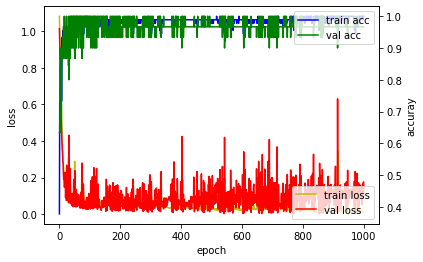

In [11]:
import matplotlib.pyplot as plt

# 결과 시각화
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(basic_history.history['loss'], 'y', label='train loss')
loss_ax.plot(basic_history.history['val_loss'], 'r', label='val loss')
acc_ax.plot(basic_history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(basic_history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [22]:
# 정확도와 손실 정보 표현
basic_loss = (basic_model.evaluate(X_test, y_test)[0])
basic_metrics = (basic_model.evaluate(X_test, y_test)[1])
print()
print('<<< 손실과 정확도 평가 >>>')
print("Basic Model의 손실 정도 ===> {}%".format(round((loss)*100,2)))
print("Basic Model의 정확도    ===> {}%".format(round((metrics)*100,2)))

1/1 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.9333

<<< 손실과 정확도 평가 >>>
Basic Model의 손실 정도 ===> 54.52%
Basic Model의 정확도    ===> 93.33%


### 3.2.1. Batch Normalization Model

In [13]:
from tensorflow.keras.initializers import RandomNormal, Constant

# 배치 정규화가 적용된 모델 생성
batch_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
]);
batch_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [23]:
# 모델 학습
batch_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

batch_history = batch_model.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 0s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/1000
3/3 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/1000
3/3 - 0s - loss: 0.0275 - accuracy: 0.9889 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/1000
3/3 - 0s - loss: 0.0384 - accuracy: 0.9889 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 6/1000
3/3 - 0s - loss: 0.0260 - accuracy: 0.9778 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 7/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 8/1000
3/3 - 0s - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 9/1000
3/3 - 0s - loss: 0.0254 - accuracy: 0.9889 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 10/1000
3/3 - 0s - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0308 - accuracy: 0.9889 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 85/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 86/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 87/1000
3/3 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 88/1000
3/3 - 0s - loss: 0.0152 - accuracy: 0.9889 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 89/1000
3/3 - 0s - loss: 0.0392 - accuracy: 0.9889 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 90/1000
3/3 - 0s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 91/1000
3/3 - 0s - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 92/1000
3/3 - 0s - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 93/1000
3/3 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9667
Epoch 168/1000
3/3 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 169/1000
3/3 - 0s - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 170/1000
3/3 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 171/1000
3/3 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 172/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 173/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 174/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 175/1000
3/3 - 0s - loss: 0.0240 - accuracy: 0.9889 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 176/1000
3/3 - 0s - loss: 0.0420 - accuracy: 0.9889 - val_loss: 0.0024 - val_accuracy: 1.0000


Epoch 249/1000
3/3 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 250/1000
3/3 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 251/1000
3/3 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 252/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 253/1000
3/3 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 254/1000
3/3 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 255/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 256/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 8.5479e-04 - val_accuracy: 1.0000
Epoch 257/1000
3/3 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 7.1971e-04 - val_accuracy: 1.0000
Epoch 258/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 8.2060e-04 - val_accur

Epoch 331/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9667
Epoch 332/1000
3/3 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9667
Epoch 333/1000
3/3 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9667
Epoch 334/1000
3/3 - 0s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 0.9667
Epoch 335/1000
3/3 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9667
Epoch 336/1000
3/3 - 0s - loss: 0.0301 - accuracy: 0.9889 - val_loss: 0.0432 - val_accuracy: 0.9667
Epoch 337/1000
3/3 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 338/1000
3/3 - 0s - loss: 0.0473 - accuracy: 0.9667 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 339/1000
3/3 - 0s - loss: 0.0225 - accuracy: 0.9889 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 340/1000
3/3 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9667


Epoch 413/1000
3/3 - 0s - loss: 0.0285 - accuracy: 0.9889 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 414/1000
3/3 - 0s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 415/1000
3/3 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 416/1000
3/3 - 0s - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 417/1000
3/3 - 0s - loss: 0.0226 - accuracy: 0.9889 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 418/1000
3/3 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 419/1000
3/3 - 0s - loss: 0.0275 - accuracy: 0.9889 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 420/1000
3/3 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 421/1000
3/3 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 422/1000
3/3 - 0s - loss: 0.0233 - accuracy: 0.9889 - val_loss: 0.0165 - val_accuracy: 1.0000


Epoch 495/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 496/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 497/1000
3/3 - 0s - loss: 0.0129 - accuracy: 0.9889 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 498/1000
3/3 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 499/1000
3/3 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 500/1000
3/3 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 501/1000
3/3 - 0s - loss: 0.0227 - accuracy: 0.9889 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 502/1000
3/3 - 0s - loss: 0.0131 - accuracy: 0.9889 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 503/1000
3/3 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 504/1000
3/3 - 0s - loss: 0.0272 - accuracy: 0.9889 - val_loss: 0.0160 - val_accuracy: 1.0000


Epoch 577/1000
3/3 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9333
Epoch 578/1000
3/3 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9667
Epoch 579/1000
3/3 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9667
Epoch 580/1000
3/3 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 581/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 582/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 583/1000
3/3 - 0s - loss: 0.0188 - accuracy: 0.9889 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 584/1000
3/3 - 0s - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0240 - val_accuracy: 0.9667
Epoch 585/1000
3/3 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 0.9667
Epoch 586/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9667


Epoch 659/1000
3/3 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 660/1000
3/3 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 661/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 662/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 663/1000
3/3 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 664/1000
3/3 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 665/1000
3/3 - 0s - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 666/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 667/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 668/1000
3/3 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000


Epoch 741/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9667
Epoch 742/1000
3/3 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9667
Epoch 743/1000
3/3 - 0s - loss: 0.0147 - accuracy: 0.9889 - val_loss: 0.1209 - val_accuracy: 0.9667
Epoch 744/1000
3/3 - 0s - loss: 0.0738 - accuracy: 0.9778 - val_loss: 0.1188 - val_accuracy: 0.9667
Epoch 745/1000
3/3 - 0s - loss: 0.0573 - accuracy: 0.9889 - val_loss: 0.1023 - val_accuracy: 0.9333
Epoch 746/1000
3/3 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9667
Epoch 747/1000
3/3 - 0s - loss: 0.0472 - accuracy: 0.9778 - val_loss: 0.0808 - val_accuracy: 0.9667
Epoch 748/1000
3/3 - 0s - loss: 0.0472 - accuracy: 0.9778 - val_loss: 0.1133 - val_accuracy: 0.9000
Epoch 749/1000
3/3 - 0s - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.1282 - val_accuracy: 0.9000
Epoch 750/1000
3/3 - 0s - loss: 0.0668 - accuracy: 0.9889 - val_loss: 0.1014 - val_accuracy: 0.9333


Epoch 822/1000
3/3 - 0s - loss: 0.0466 - accuracy: 0.9889 - val_loss: 0.5049 - val_accuracy: 0.8667
Epoch 823/1000
3/3 - 0s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.3055 - val_accuracy: 0.8667
Epoch 824/1000
3/3 - 0s - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.2595 - val_accuracy: 0.9000
Epoch 825/1000
3/3 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.3507 - val_accuracy: 0.8667
Epoch 826/1000
3/3 - 0s - loss: 0.0461 - accuracy: 0.9778 - val_loss: 0.4115 - val_accuracy: 0.8333
Epoch 827/1000
3/3 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.8333
Epoch 828/1000
3/3 - 0s - loss: 0.0593 - accuracy: 0.9889 - val_loss: 0.3997 - val_accuracy: 0.8667
Epoch 829/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.3380 - val_accuracy: 0.8667
Epoch 830/1000
3/3 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2961 - val_accuracy: 0.9000
Epoch 831/1000
3/3 - 0s - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.2573 - val_accuracy: 0.9000


Epoch 904/1000
3/3 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9667
Epoch 905/1000
3/3 - 0s - loss: 0.0495 - accuracy: 0.9778 - val_loss: 0.0794 - val_accuracy: 0.9667
Epoch 906/1000
3/3 - 0s - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 907/1000
3/3 - 0s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 908/1000
3/3 - 0s - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 909/1000
3/3 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 910/1000
3/3 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 911/1000
3/3 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 912/1000
3/3 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 913/1000
3/3 - 0s - loss: 0.0337 - accuracy: 0.9778 - val_loss: 0.0060 - val_accuracy: 1.0000


Epoch 986/1000
3/3 - 0s - loss: 0.0162 - accuracy: 0.9889 - val_loss: 0.0635 - val_accuracy: 0.9667
Epoch 987/1000
3/3 - 0s - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0408 - val_accuracy: 0.9667
Epoch 988/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 989/1000
3/3 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9667
Epoch 990/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 0.9333
Epoch 991/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 0.9333
Epoch 992/1000
3/3 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9333
Epoch 993/1000
3/3 - 0s - loss: 0.0152 - accuracy: 0.9889 - val_loss: 0.1443 - val_accuracy: 0.9333
Epoch 994/1000
3/3 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy: 0.9333
Epoch 995/1000
3/3 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1424 - val_accuracy: 0.9333


### 3.2.2 Batch Normalization Model 결과 출력

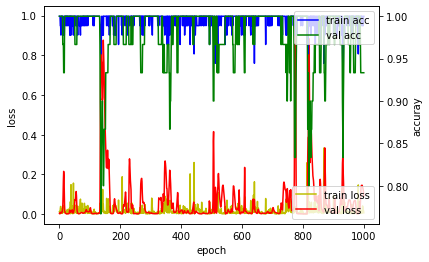

In [24]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(batch_history.history['loss'], 'y', label='train loss')
loss_ax.plot(batch_history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(batch_history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(batch_history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [26]:
# 정확도와 손실 정보 표현
batch_loss = (batch_model.evaluate(X_test, y_test)[0])
batch_metrics = (batch_model.evaluate(X_test, y_test)[1])
print()
print('<<< 손실과 정확도 평가 >>>')
print("Batch Model의 손실 정도 ===> {}%".format(round((batch_loss)*100,2)))
print("Batch Model의 정확도    ===> {}%".format(round((batch_metrics)*100,2)))

1/1 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9333

<<< 손실과 정확도 평가 >>>
Batch Model의 손실 정도 ===> 19.46%
Batch Model의 정확도    ===> 93.33%


### 3.3.1. Dropout Model

In [ ]:
# 임베딩층에서 양방향 RNN, LSTM 층을 이용하여 층을 구성하기 때문에 드랍아웃 모델은 좀 더 공부후 추가 진행